 # Лабораторная работа №1 Проведение исследований с алгоритмом KNN


## 1. Выбор начальных условий

### Набор данных для классификации [Credit score classification](https://www.kaggle.com/datasets/parisrohan/credit-score-classification)


Набор данных содержит информацию о кредитоспособности клиентов банка.

 Целевая переменная: `Credit score` кредитный рейтинг  (Poor, Standard, Good).

 Задача: мультиклассовая классификация. 

 Практическая задача: Классифицировать кредитный рейтинг клиента.

### Набор данных для регрессии [Vestiaire Collective Dataset](https://www.kaggle.com/datasets/justinpakzad/vestiaire-fashion-dataset)

Этот набор данных содержит объявления о товарах с Vestiaire, онлайн-площадки для покупки и продажи подержанных предметов роскоши.

 Целевая переменная: `seller_price` цена товара.

 Задача: регрессия.

 Практическая задача: Предсказать какая цена будет у б/у товара по его характеристикам.

### Выбор метрик качества для классификации
- Accuracy - доля верно предсказанных классов.
- Recall - доля правильно предсказанных объектов класса среди всех объектов данного класса.
- Precision - доля того, сколько отнесенных моделью к определенному классу объектов, действительно ему принадлежит.
- F1-score - баланс между recall и precision.

### Выбор метрик качества для крегрессии
- MAE - средняя абсолютная ошибка.
- RMSE - корень среднеквадратичной ошибки (более чувствительна к большим отклонениям).
- R2 - показывает, какая доля вариации зависимой переменной объясняется независимыми переменными в регрессионной модели.

## 2. Создание бейзлайна и оценка качества

Импорт библиотек

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import seaborn as sns
import matplotlib.pyplot as plt

### Классификация

Загрузка датасета

In [2]:
df = pd.read_csv(
    "train.csv"
)

df.head()


/tmp/ipykernel_25706/4101760861.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [55]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


Удалим признаки, которые нам явно не нужны (нечисловые и не можем причислить их к категориальным).

In [5]:
drop_cols = [
    'ID',
    'Customer_ID',
    'Name',
    'SSN',
    'Month',
    'Credit_History_Age'
]

df = df.drop(columns=drop_cols)


In [54]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

Есть поля, которые очевидно ошибочно интерпретируются, как object.

In [7]:
num_as_obj = [
    'Age',
    'Annual_Income',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Outstanding_Debt',
    'Amount_invested_monthly',
    'Monthly_Balance'
]

for col in num_as_obj:
    df[col] = pd.to_numeric(df[col], errors='coerce')

Посмотрим пропуски после приведения типов

In [8]:
df.isnull().sum()

Age                          4939
Occupation                      0
Annual_Income                6980
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                  4785
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       9746
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt             1009
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      8784
Payment_Behaviour               0
Monthly_Balance              1209
Credit_Score                    0
dtype: int64

Супер, пропусков в значениях после приведения типов не очень много, заполним их медианой.

In [9]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  float64
 8   Type_of_Loan              88592 non-null   object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  ob

Заполним остальные пропуски модой.

In [11]:
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [12]:
df.isnull().sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

Выбор целевой переменной + используем только 25000 строк из всего датасета, потому что иначе ноут умрет.

In [ ]:
sample_size = 25000
df_sample = df.sample(n=sample_size, random_state=42)

X_sample = df_sample.drop('Credit_Score', axis=1)
y_sample = df_sample['Credit_Score']

Разделение выборки на train/test.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample,
    test_size=0.2,
    random_state=42,
    stratify=y_sample
)

Формирование пайплайна

In [ ]:
num_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_sample.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

knn_pipeline = Pipeline(
    steps=[
        ('preprocess', preprocessor),
        ('model', KNeighborsClassifier())
    ]
)

In [20]:
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour'],
      dtype='object'))])),
                ('model', KNeighborsClassifier())])

Обучение и вывод метрик.

In [21]:
y_pred = knn_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6252
              precision    recall  f1-score   support

        Good       0.49      0.55      0.52       884
        Poor       0.61      0.54      0.57      1463
    Standard       0.68      0.70      0.69      2653

    accuracy                           0.63      5000
   macro avg       0.59      0.60      0.59      5000
weighted avg       0.63      0.63      0.63      5000



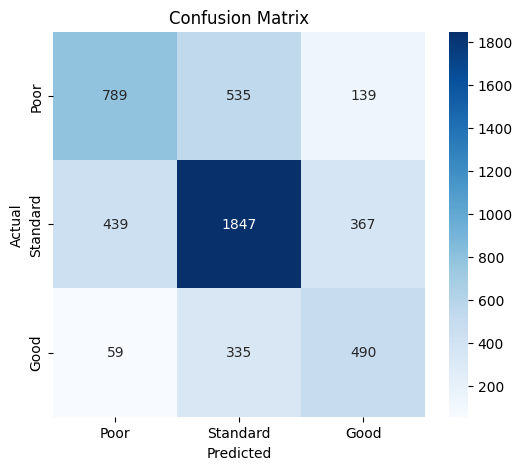

In [22]:
cm = confusion_matrix(y_test, y_pred, labels=['Poor', 'Standard', 'Good'])

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Poor', 'Standard', 'Good'], yticklabels=['Poor', 'Standard', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Качество модели не на высоте. Но в среднем метрики показывают больше 50%, что для начала неплохо. Лучше всего модель справляется с рейтингом стандартным, но путает хороший со стандартным и плохой со стандартным. К счастью, плохой и хороший путает сильно реже.

### Регрессия

Здесь я загружаю не весь датасет целиком, так как в нем слишком много записей (900 тыс.) Я обрезала его до 20 тысяч строк, соблюдя распределение данных в изначальном датасете, но обрезав хвост (было какое-то количество нереально дорогих товаров).

In [31]:
df_reg = pd.read_csv(
    "vestiaire_20k.csv"
)

df_reg.head()

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,42438630,Wool hat,Wool hat Napapijri Black size 55 cm in Wool,"one size, like new",Napapijri Wool Hats & pull on hats,Men,Men Accessories,Autumn / Winter,Never worn,0.0,...,Tourcoing,25355068,Raffaele25355068,1-2 days,Italy,11.0,27.0,0.0,131.0,100.0
1,30324738,Leather flats,Leather flats Bruno Magli Black size 43.5 EU i...,"Excellent condition! UK size 9.5, EU 43.5",Bruno Magli Leather Flats,Men,Men Shoes,All seasons,Very good condition,6.0,...,Tourcoing,12877585,stelios12877585,NaN,Greece,5.0,2.0,649116.0,5.0,100.0
2,39089334,Polo shirt,Polo shirt LA MARTINA Multicolour size XXL Int...,"La Martina long sleeve polo shirt, size XXL in...",LA MARTINA Cotton Polo shirts,Men,Men Clothing,All seasons,Good condition,2.0,...,Tourcoing,21283960,anneanna21283960,1-2 days,Germany,132.0,90.0,0.0,25.0,95.0
3,39285681,Scarf,Scarf Twinset White in Cotton,Lightweight cotton scarf. White color with 2 h...,Twinset Cotton Scarves,Women,Women Accessories,Autumn / Winter,Very good condition,7.0,...,Tourcoing,15273943,bianca15273943,3-5 days,Italy,5.0,38.0,0.0,7.0,100.0
4,41107394,Leather low trainers,Leather low trainers Tod's Blue size 9.5 UK in...,"Iconic Tod's shoe, dark blue color. Mix suede ...",Tod's Leather Trainers,Men,Men Shoes,All seasons,Good condition,3.0,...,Tourcoing,19395265,Nicchia_20,6-7 days,Italy,4.0,15.0,0.0,163.0,100.0


In [32]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19994 entries, 0 to 19993
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  19994 non-null  int64  
 1   product_type                19994 non-null  object 
 2   product_name                19994 non-null  object 
 3   product_description         19994 non-null  object 
 4   product_keywords            19965 non-null  object 
 5   product_gender_target       19994 non-null  object 
 6   product_category            19965 non-null  object 
 7   product_season              19994 non-null  object 
 8   product_condition           19994 non-null  object 
 9   product_like_count          19994 non-null  float64
 10  sold                        19994 non-null  bool   
 11  reserved                    19994 non-null  bool   
 12  available                   19994 non-null  bool   
 13  in_stock                    199

In [33]:
df_reg.describe()

,product_id,product_like_count,brand_id,price_usd,seller_price,seller_earning,buyers_fees,seller_id,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
count,1.999400e+04,19994.000000,19994.000000,19994.000000,19994.000000,19994.000000,19681.000000,1.999400e+04,19994.000000,19994.000000,1.999400e+04,1.999400e+04,19994.000000
mean,3.789884e+07,6.414874,2432.360358,392.407351,337.166006,295.466132,55.448804,1.372881e+07,636.272682,1453.672152,5.670247e+04,1.087432e+04,72.507837
std,7.967897e+06,11.736085,3716.428454,1579.002390,1379.832148,1283.625167,228.968870,7.562008e+06,3416.384161,5317.455358,1.443641e+05,3.747820e+05,34.398437
min,2.520950e+05,0.000000,2.000000,12.780000,10.650000,0.000000,0.000000,1.130000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,3.782798e+07,1.000000,66.000000,83.070000,71.360000,58.000000,11.720000,7.882962e+06,6.000000,10.000000,0.000000e+00,1.700000e+01,68.000000
50%,4.170594e+07,3.000000,341.000000,168.700000,143.780000,125.720000,23.430000,1.422578e+07,35.000000,54.000000,0.000000e+00,7.500000e+01,88.000000
75%,4.267136e+07,7.000000,3263.000000,350.000000,298.200000,261.990000,50.690000,1.939552e+07,179.000000,374.000000,2.552175e+04,2.960000e+02,95.000000
max,4.324845e+07,292.000000,18235.000000,89789.230000,74824.360000,72579.630000,14964.870000,2.608045e+07,79738.000000,39628.000000,1.062920e+06,1.417850e+07,100.000000


In [39]:
df_reg.isnull().sum()

product_type                  0
product_gender_target         0
product_category              0
product_season                0
product_condition             0
product_like_count            0
sold                          0
reserved                      0
available                     0
in_stock                      0
should_be_gone                0
product_material              0
product_color                 0
price_usd                     0
seller_earning                0
seller_badge                  0
has_cross_border_fees         0
buyers_fees                   0
warehouse_name                0
usually_ships_within          0
seller_products_sold          0
seller_num_products_listed    0
seller_community_rank         0
seller_num_followers          0
seller_pass_rate              0
dtype: int64

Удалим столбцы, которые нам не нужны.

In [35]:
drop_cols = [
    'product_id', 'product_name', 'product_description', 'brand_url',
    'seller_username', 'brand_name', 'product_keywords', 'seller_id', 'brand_id', 'seller_price' , 'seller_country'
]


df_reg = df_reg.drop(columns=drop_cols)


Удалим строки с пропусками, тк их немного.

In [37]:
df_reg = df_reg.dropna(subset=[
    'product_category', 'has_cross_border_fees', 'usually_ships_within'
])

Целевая переменная, разделение выборки и кодирование.

In [40]:
df_reg_sample = df_reg

X_sample = df_reg_sample.drop('price_usd', axis=1)
y_sample = df_reg_sample['price_usd']

In [41]:
num_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_sample.select_dtypes(include=['object', 'bool']).columns

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample, test_size=0.2, random_state=42
)

In [43]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

In [ ]:
knn_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=5))
])

In [45]:
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['product_like_count', 'seller_earning', 'buyers_fees',
       'seller_products_sold', 'seller_num_products_listed',
       'seller_community_rank', 'seller_num_followers', 'seller_pass_rate'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['product_type', 'product_gender_target', 'product_category',
       'product_season', 'product_condition', 'sold', 'reserved', 'available',
       'in_stock', 'should_be_gone', 'product_material', 'product_color',
       'seller_badge', 'has_cross_border_fees', 'warehouse_name',
       'usually_ships_within'],
      dtype='object'))])),
                ('regressor', KNeighborsRegressor())])

In [46]:
y_pred = knn_pipeline.predict(X_test)

In [ ]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))

MAE: 158.50745945945945
RMSE: 336.829533503491
R2: 0.9047578784989851


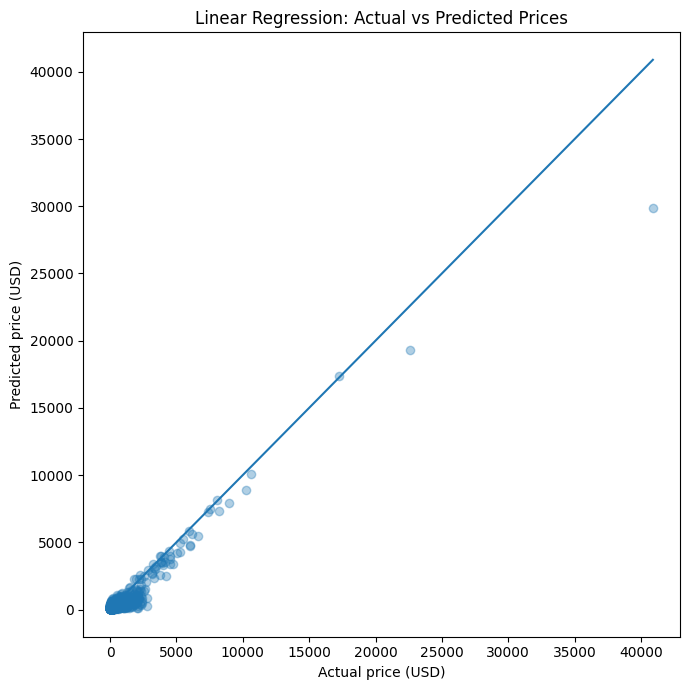

In [ ]:
plt.figure(figsize=(7, 7))

plt.scatter(y_test, y_pred, alpha=0.35)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()]
)

plt.xlabel("Actual price (USD)")
plt.ylabel("Predicted price (USD)")
plt.title("KNN: Actual vs Predicted Prices")

plt.tight_layout()
plt.show()


В целом, метриками я довольна, так как разброс между ценами большой.

## 3. Улучшение бейзлайна

### Классификация

In [3]:
df = pd.read_csv(
    "train.csv"
)

df.head()

/tmp/ipykernel_21305/3975237315.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
df.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10139
Age                           1788
SSN                          12501
Occupation                      16
Annual_Income                18940
Monthly_Inhand_Salary        13235
Num_Bank_Accounts              943
Num_Credit_Card               1179
Interest_Rate                 1750
Num_of_Loan                    434
Type_of_Loan                  6260
Delay_from_due_date             73
Num_of_Delayed_Payment         749
Changed_Credit_Limit          4384
Num_Credit_Inquiries          1223
Credit_Mix                       4
Outstanding_Debt             13178
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          14950
Amount_invested_monthly      91049
Payment_Behaviour                7
Monthly_Balance              98792
Credit_Score                     3
dtype: int64

Выполняем предобработку из предыдущего пункта.

In [6]:
num_as_obj = [
    'Age',
    'Annual_Income',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Outstanding_Debt',
    'Amount_invested_monthly',
    'Monthly_Balance'
]

for col in num_as_obj:
    df[col] = pd.to_numeric(df[col], errors='coerce')

Посмотрим на распределение классов в датасете и увидим, что преобладает standard. Возьмем из всех данных такую выборку, что на каждый класс будет одинаковое количество данных.

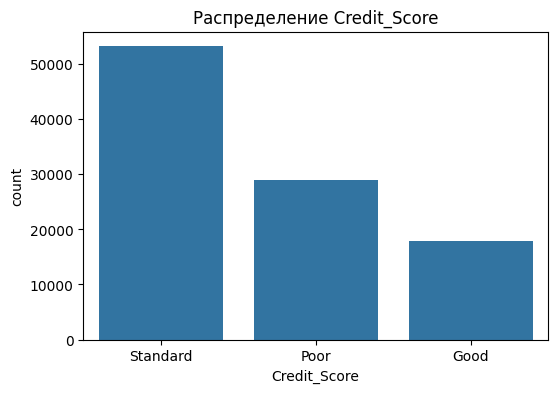

In [7]:
num_cols = [
    'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
    'Interest_Rate', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
    'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
    'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'
]

cat_cols = [
    'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Month'
]

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Credit_Score', order=df['Credit_Score'].value_counts().index)
plt.title('Распределение Credit_Score')
plt.show()

In [ ]:
#df = pd.read_csv("train.csv")

print(df['Credit_Score'].value_counts())

sample_size_per_class = 20000 // df['Credit_Score'].nunique()

df_sample = (
    df.groupby('Credit_Score', group_keys=False)
      .apply(lambda x: x.sample(min(len(x), sample_size_per_class), random_state=42))
)

print(df_sample['Credit_Score'].value_counts())

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64
Credit_Score
Good        6666
Poor        6666
Standard    6666
Name: count, dtype: int64


/tmp/ipykernel_11071/2039462732.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min(len(x), sample_size_per_class), random_state=42))


Продолжим предобработку из предыдущего пункта.

In [10]:
num_as_obj = [
    'Age',
    'Annual_Income',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Outstanding_Debt',
    'Amount_invested_monthly',
    'Monthly_Balance'
]

for col in num_as_obj:
    df_sample[col] = pd.to_numeric(df_sample[col], errors='coerce')

In [11]:
drop_cols = [
    'ID',
    'Customer_ID',
    'Name',
    'SSN',
    'Month',
    'Credit_History_Age'
]

df_sample = df_sample.drop(columns=drop_cols)

In [12]:
num_cols = df_sample.select_dtypes(include=['int64', 'float64']).columns

df_sample[num_cols] = df_sample[num_cols].fillna(df_sample[num_cols].median())

In [14]:
cat_cols = df_sample.select_dtypes(include=['object']).columns

for col in cat_cols:
    df_sample[col] = df_sample[col].fillna(df_sample[col].mode()[0])

In [15]:
X_sample = df_sample.drop('Credit_Score', axis=1)
y_sample = df_sample['Credit_Score']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample,
    test_size=0.2,
    random_state=42,
    stratify=y_sample
)

In [17]:
num_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_sample.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

knn_pipeline = Pipeline(
    steps=[
        ('preprocess', preprocessor),
        ('model', KNeighborsClassifier())
    ]
)

In [18]:
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour'],
      dtype='object'))])),
                ('model', KNeighborsClassifier())])

Вывожу метрики.

In [19]:
y_pred = knn_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.64375
              precision    recall  f1-score   support

        Good       0.63      0.80      0.70      1333
        Poor       0.69      0.68      0.68      1333
    Standard       0.61      0.46      0.52      1334

    accuracy                           0.64      4000
   macro avg       0.64      0.64      0.64      4000
weighted avg       0.64      0.64      0.64      4000



Получили неплохой прирост, анализируем дальше.

In [32]:
df = pd.read_csv(
    "train.csv"
)

df.head()

/tmp/ipykernel_15901/3975237315.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


Раньше я совсем не использовала Credit_History_Age, однако можно привести это поле к числу (количество лет).

In [ ]:
import re

def convert_credit_history(age_str):
    if pd.isna(age_str):
        return None
    match = re.match(r'(\d+)\s*Years\s*and\s*(\d+)?\s*Months', age_str)
    if match:
        years = int(match.group(1))
        months = int(match.group(2)) if match.group(2) else 0
        return years + months / 12
    else:
        return None

df['Credit_History_Age_num'] = df['Credit_History_Age'].apply(convert_credit_history)

df[['Credit_History_Age', 'Credit_History_Age_num']].head()

,Credit_History_Age,Credit_History_Age_num
0,22 Years and 1 Months,22.083333
1,NaN,NaN
2,22 Years and 3 Months,22.250000
3,22 Years and 4 Months,22.333333
4,22 Years and 5 Months,22.416667


In [34]:
num_as_obj = [
    'Age',
    'Annual_Income',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Outstanding_Debt',
    'Amount_invested_monthly',
    'Monthly_Balance'
]

for col in num_as_obj:
    df[col] = pd.to_numeric(df[col], errors='coerce')

Попробуем еще обработать нереалистичные данные возраста и кредитной истории.

In [35]:
df = df[(df['Credit_History_Age_num'].between(0, 100))]

df = df[(df['Age'].between(0, 100))]

In [36]:
drop_cols = [
    'ID',
    'Customer_ID',
    'Name',
    'SSN',
    'Month',
    'Credit_History_Age'
]

df = df.drop(columns=drop_cols)

In [37]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [38]:
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
print(df['Credit_Score'].value_counts())

sample_size_per_class = 20000 // df['Credit_Score'].nunique()

df_sample = (
    df.groupby('Credit_Score', group_keys=False)
      .apply(lambda x: x.sample(min(len(x), sample_size_per_class), random_state=42))
)

print(df_sample['Credit_Score'].value_counts())

Credit_Score
Standard    44748
Poor        24401
Good        14882
Name: count, dtype: int64
Credit_Score
Good        6666
Poor        6666
Standard    6666
Name: count, dtype: int64


/tmp/ipykernel_15901/2039462732.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min(len(x), sample_size_per_class), random_state=42))


In [40]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19998 entries, 7788 to 12884
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       19998 non-null  float64
 1   Occupation                19998 non-null  object 
 2   Annual_Income             19998 non-null  float64
 3   Monthly_Inhand_Salary     19998 non-null  float64
 4   Num_Bank_Accounts         19998 non-null  int64  
 5   Num_Credit_Card           19998 non-null  int64  
 6   Interest_Rate             19998 non-null  int64  
 7   Num_of_Loan               19998 non-null  float64
 8   Type_of_Loan              19998 non-null  object 
 9   Delay_from_due_date       19998 non-null  int64  
 10  Num_of_Delayed_Payment    19998 non-null  float64
 11  Changed_Credit_Limit      19998 non-null  float64
 12  Num_Credit_Inquiries      19998 non-null  float64
 13  Credit_Mix                19998 non-null  object 
 14  Outstand

In [41]:
X_sample = df_sample.drop('Credit_Score', axis=1)
y_sample = df_sample['Credit_Score']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample,
    test_size=0.2,
    random_state=42,
    stratify=y_sample
)

In [43]:
num_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_sample.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

knn_pipeline = Pipeline(
    steps=[
        ('preprocess', preprocessor),
        ('model', KNeighborsClassifier())
    ]
)

In [44]:
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
       'Credit_History_Age_num'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour'],
      dtype='object'))])),
                ('model', KNeighborsClassifier())])

In [45]:
y_pred = knn_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.66125
              precision    recall  f1-score   support

        Good       0.65      0.83      0.73      1333
        Poor       0.70      0.69      0.69      1333
    Standard       0.64      0.47      0.54      1334

    accuracy                           0.66      4000
   macro avg       0.66      0.66      0.65      4000
weighted avg       0.66      0.66      0.65      4000



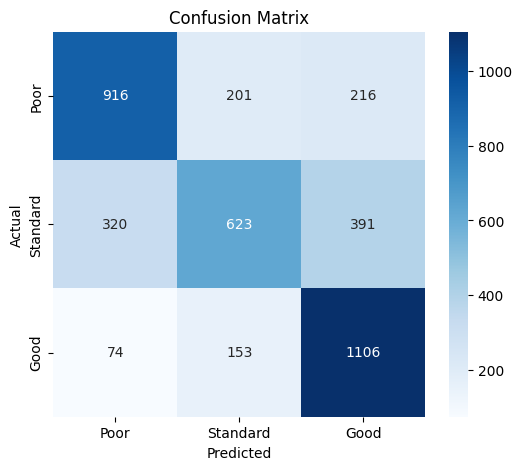

In [46]:
cm = confusion_matrix(y_test, y_pred, labels=['Poor', 'Standard', 'Good'])

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Poor', 'Standard', 'Good'], yticklabels=['Poor', 'Standard', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Получили еще больший прирост. Попробуем подобрать параметры.

Best parameters: {'model__n_neighbors': 9}
Accuracy: 0.67675
              precision    recall  f1-score   support

        Good       0.66      0.84      0.74      1333
        Poor       0.73      0.69      0.71      1333
    Standard       0.65      0.50      0.56      1334

    accuracy                           0.68      4000
   macro avg       0.68      0.68      0.67      4000
weighted avg       0.68      0.68      0.67      4000



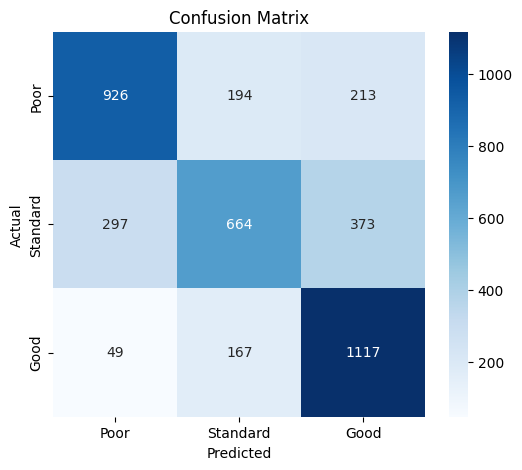

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__n_neighbors': [3, 5, 7, 9],
}

grid_search = GridSearchCV(
    estimator=knn_pipeline,
    param_grid=param_grid,
    cv=3,  
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

cm = confusion_matrix(y_test, y_pred_best, labels=['Poor', 'Standard', 'Good'])
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Poor', 'Standard', 'Good'], yticklabels=['Poor', 'Standard', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Лучший результат при k=9.

In [66]:
df = pd.read_csv(
    "train.csv"
)

df.head()

/tmp/ipykernel_15901/3975237315.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
import re

def convert_credit_history(age_str):
    if pd.isna(age_str):
        return None
    match = re.match(r'(\d+)\s*Years\s*and\s*(\d+)?\s*Months', age_str)
    if match:
        years = int(match.group(1))
        months = int(match.group(2)) if match.group(2) else 0
        return years + months / 12
    else:
        return None

df['Credit_History_Age_num'] = df['Credit_History_Age'].apply(convert_credit_history)

df[['Credit_History_Age', 'Credit_History_Age_num']].head()

,Credit_History_Age,Credit_History_Age_num
0,22 Years and 1 Months,22.083333
1,NaN,NaN
2,22 Years and 3 Months,22.250000
3,22 Years and 4 Months,22.333333
4,22 Years and 5 Months,22.416667


In [68]:
num_as_obj = [
    'Age',
    'Annual_Income',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Outstanding_Debt',
    'Amount_invested_monthly',
    'Monthly_Balance'
]

for col in num_as_obj:
    df[col] = pd.to_numeric(df[col], errors='coerce')

Обработаем кредитную историю и возраст до заполнения пустых значений.

In [71]:
df = df[(df['Credit_History_Age_num'].between(0, 100))]

df = df[(df['Age'].between(0, 100))]

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 84031 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        84031 non-null  object 
 1   Customer_ID               84031 non-null  object 
 2   Month                     84031 non-null  object 
 3   Name                      75621 non-null  object 
 4   Age                       84031 non-null  float64
 5   SSN                       84031 non-null  object 
 6   Occupation                84031 non-null  object 
 7   Annual_Income             78134 non-null  float64
 8   Monthly_Inhand_Salary     71374 non-null  float64
 9   Num_Bank_Accounts         84031 non-null  int64  
 10  Num_Credit_Card           84031 non-null  int64  
 11  Interest_Rate             84031 non-null  int64  
 12  Num_of_Loan               80030 non-null  float64
 13  Type_of_Loan              74456 non-null  object 
 14  Delay_from_

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Age_num
count,84031.000000,7.813400e+04,71374.000000,84031.000000,84031.00000,84031.000000,80030.000000,84031.000000,75869.000000,82281.000000,82377.000000,83178.000000,84031.000000,84031.000000,76653.000000,83018.000000,84031.000000
mean,33.318121,1.805248e+05,4202.582041,17.123930,22.72904,72.641811,2.720530,21.070855,31.076223,10.393332,27.605169,1428.437196,32.294718,1395.610467,195.925574,402.630845,18.438131
std,10.787815,1.459064e+06,3186.533446,117.410805,130.00916,467.052360,62.381969,14.868037,226.856339,6.788423,191.835810,1155.756360,5.117953,8264.899914,199.514413,214.257488,8.307208
min,14.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,-100.000000,-5.000000,-3.000000,-6.480000,0.000000,0.230000,20.100770,0.000000,0.000000,0.007760,0.083333
25%,24.000000,1.946258e+04,1628.847500,3.000000,4.00000,8.000000,1.000000,10.000000,9.000000,5.340000,3.000000,568.670000,28.060077,30.419540,72.440248,269.955211,12.083333
50%,33.000000,3.767914e+04,3101.888395,6.000000,5.00000,14.000000,3.000000,18.000000,14.000000,9.410000,6.000000,1167.560000,32.323630,69.421937,129.312089,336.527967,18.333333
75%,42.000000,7.309882e+04,5974.963333,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.870000,9.000000,1948.990000,36.507915,161.753235,237.739275,470.730083,25.166667
max,100.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1485.000000,67.000000,4397.000000,36.970000,2594.000000,4998.070000,50.000000,82331.000000,1977.326102,1602.040519,33.666667


In [72]:
drop_cols = [
    'ID',
    'Customer_ID',
    'Name',
    'SSN',
    'Month',
    'Credit_History_Age'
]

df = df.drop(columns=drop_cols)

In [73]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [74]:
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
print(df['Credit_Score'].value_counts())

sample_size_per_class = 20000 // df['Credit_Score'].nunique()

df_sample = (
    df.groupby('Credit_Score', group_keys=False)
      .apply(lambda x: x.sample(min(len(x), sample_size_per_class), random_state=42))
)

print(df_sample['Credit_Score'].value_counts())

Credit_Score
Standard    44748
Poor        24401
Good        14882
Name: count, dtype: int64
Credit_Score
Good        6666
Poor        6666
Standard    6666
Name: count, dtype: int64


/tmp/ipykernel_15901/2039462732.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min(len(x), sample_size_per_class), random_state=42))


In [76]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19998 entries, 7788 to 12884
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       19998 non-null  float64
 1   Occupation                19998 non-null  object 
 2   Annual_Income             19998 non-null  float64
 3   Monthly_Inhand_Salary     19998 non-null  float64
 4   Num_Bank_Accounts         19998 non-null  int64  
 5   Num_Credit_Card           19998 non-null  int64  
 6   Interest_Rate             19998 non-null  int64  
 7   Num_of_Loan               19998 non-null  float64
 8   Type_of_Loan              19998 non-null  object 
 9   Delay_from_due_date       19998 non-null  int64  
 10  Num_of_Delayed_Payment    19998 non-null  float64
 11  Changed_Credit_Limit      19998 non-null  float64
 12  Num_Credit_Inquiries      19998 non-null  float64
 13  Credit_Mix                19998 non-null  object 
 14  Outstand

In [77]:
X_sample = df_sample.drop('Credit_Score', axis=1)
y_sample = df_sample['Credit_Score']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample,
    test_size=0.2,
    random_state=42,
    stratify=y_sample
)

In [79]:
num_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_sample.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

knn_pipeline = Pipeline(
    steps=[
        ('preprocess', preprocessor),
        ('model', KNeighborsClassifier())
    ]
)

In [80]:
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
       'Credit_History_Age_num'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour'],
      dtype='object'))])),
                ('model', KNeighborsClassifier())])

In [81]:
y_pred = knn_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.66125
              precision    recall  f1-score   support

        Good       0.65      0.83      0.73      1333
        Poor       0.70      0.69      0.69      1333
    Standard       0.64      0.47      0.54      1334

    accuracy                           0.66      4000
   macro avg       0.66      0.66      0.65      4000
weighted avg       0.66      0.66      0.65      4000



Best parameters: {'model__n_neighbors': 15}
Accuracy: 0.68825
              precision    recall  f1-score   support

        Good       0.66      0.86      0.75      1333
        Poor       0.74      0.71      0.72      1333
    Standard       0.67      0.50      0.58      1334

    accuracy                           0.69      4000
   macro avg       0.69      0.69      0.68      4000
weighted avg       0.69      0.69      0.68      4000



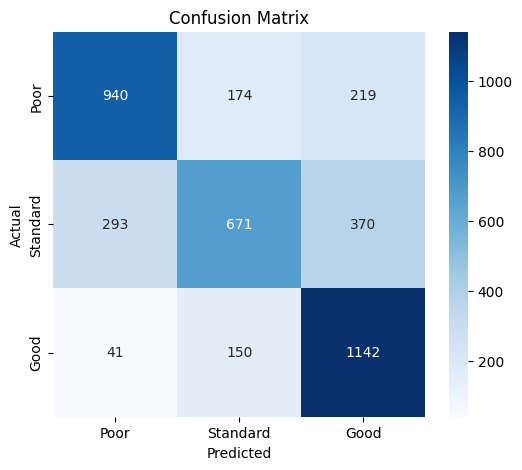

In [82]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__n_neighbors': [3, 5, 7, 9, 15],
}

grid_search = GridSearchCV(
    estimator=knn_pipeline,
    param_grid=param_grid,
    cv=3,  
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

cm = confusion_matrix(y_test, y_pred_best, labels=['Poor', 'Standard', 'Good'])
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Poor', 'Standard', 'Good'], yticklabels=['Poor', 'Standard', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Попробовала еще k=15. Вышло лучше, чем при k=9. Сейчас имеем лучший результат.

### Регрессия

In [53]:
df_reg = pd.read_csv(
    "vestiaire_20k.csv"
)

df_reg.head()

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,42438630,Wool hat,Wool hat Napapijri Black size 55 cm in Wool,"one size, like new",Napapijri Wool Hats & pull on hats,Men,Men Accessories,Autumn / Winter,Never worn,0.0,...,Tourcoing,25355068,Raffaele25355068,1-2 days,Italy,11.0,27.0,0.0,131.0,100.0
1,30324738,Leather flats,Leather flats Bruno Magli Black size 43.5 EU i...,"Excellent condition! UK size 9.5, EU 43.5",Bruno Magli Leather Flats,Men,Men Shoes,All seasons,Very good condition,6.0,...,Tourcoing,12877585,stelios12877585,NaN,Greece,5.0,2.0,649116.0,5.0,100.0
2,39089334,Polo shirt,Polo shirt LA MARTINA Multicolour size XXL Int...,"La Martina long sleeve polo shirt, size XXL in...",LA MARTINA Cotton Polo shirts,Men,Men Clothing,All seasons,Good condition,2.0,...,Tourcoing,21283960,anneanna21283960,1-2 days,Germany,132.0,90.0,0.0,25.0,95.0
3,39285681,Scarf,Scarf Twinset White in Cotton,Lightweight cotton scarf. White color with 2 h...,Twinset Cotton Scarves,Women,Women Accessories,Autumn / Winter,Very good condition,7.0,...,Tourcoing,15273943,bianca15273943,3-5 days,Italy,5.0,38.0,0.0,7.0,100.0
4,41107394,Leather low trainers,Leather low trainers Tod's Blue size 9.5 UK in...,"Iconic Tod's shoe, dark blue color. Mix suede ...",Tod's Leather Trainers,Men,Men Shoes,All seasons,Good condition,3.0,...,Tourcoing,19395265,Nicchia_20,6-7 days,Italy,4.0,15.0,0.0,163.0,100.0


Выполняем предобработку как в предыдущем пункте.

In [54]:
drop_cols = [
    'product_id', 'product_name', 'product_description', 'brand_url',
    'seller_username', 'brand_name', 'product_keywords', 'seller_id', 'brand_id', 'seller_price' , 'seller_country'
]


df_reg = df_reg.drop(columns=drop_cols)

In [55]:
df_reg = df_reg.dropna(subset=[
    'product_category', 'has_cross_border_fees', 'usually_ships_within'
])

In [56]:
df_reg_sample = df_reg

X_sample = df_reg_sample.drop('price_usd', axis=1)
y_sample = df_reg_sample['price_usd']

In [59]:
num_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_sample.select_dtypes(include=['object', 'bool']).columns

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample, test_size=0.2, random_state=42
)

In [63]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

Подбираем параметры.

In [66]:
k_values = [3, 5, 7, 9, 15]
results = []

for k in k_values:
    knn_pipeline = Pipeline([
        ('preprocess', preprocessor),
        ('regressor', KNeighborsRegressor(
            n_neighbors=k,
            weights='distance'   
        ))
    ])
    
    knn_pipeline.fit(X_train, y_train)
    y_pred = knn_pipeline.predict(X_test)
    
    results.append({
        'k': k,
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
results_df

,k,MAE,RMSE,R2
0,3,157.225697,286.216779,0.931230
1,5,155.956323,333.922787,0.906395
2,7,155.948688,376.248533,0.881161
3,9,155.999145,410.785597,0.858343
4,15,161.752697,488.921421,0.799328


Видим, что есть результаты лучше, чем у нас были - при k=3.

Заметим, что поле product_type имеет очень много уникальных значений. Возможно, стоит от него избавиться.

In [77]:
df_reg_sample.nunique()

product_type                  1402
product_gender_target            2
product_category                 6
product_season                   3
product_condition                5
product_like_count             116
sold                             1
reserved                         1
available                        2
in_stock                         2
should_be_gone                   1
product_material                61
product_color                   23
price_usd                     3050
seller_earning                4232
seller_badge                     3
has_cross_border_fees            1
buyers_fees                   2546
warehouse_name                   5
usually_ships_within             4
seller_products_sold          1014
seller_num_products_listed    1307
seller_community_rank         5115
seller_num_followers          1354
seller_pass_rate               193
dtype: int64

In [ ]:
drop_cols = ['product_type']

df_reg_sample_n = df_reg_sample.drop(columns=drop_cols)

product_gender_target            2
product_category                 6
product_season                   3
product_condition                5
product_like_count             116
sold                             1
reserved                         1
available                        2
in_stock                         2
should_be_gone                   1
product_material                61
product_color                   23
price_usd                     3050
seller_earning                4232
seller_badge                     3
has_cross_border_fees            1
buyers_fees                   2546
warehouse_name                   5
usually_ships_within             4
seller_products_sold          1014
seller_num_products_listed    1307
seller_community_rank         5115
seller_num_followers          1354
seller_pass_rate               193
dtype: int64

In [72]:
X_sample = df_reg_sample_n.drop('price_usd', axis=1)
y_sample = df_reg_sample_n['price_usd']

In [73]:
num_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_sample.select_dtypes(include=['object', 'bool']).columns

In [74]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample, test_size=0.2, random_state=42
)

In [75]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

In [76]:
k_values = [3, 5, 7, 9, 15]
results = []

for k in k_values:
    knn_pipeline = Pipeline([
        ('preprocess', preprocessor),
        ('regressor', KNeighborsRegressor(
            n_neighbors=k,
            weights='distance'   
        ))
    ])
    
    knn_pipeline.fit(X_train, y_train)
    y_pred = knn_pipeline.predict(X_test)
    
    results.append({
        'k': k,
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
results_df

,k,MAE,RMSE,R2
0,3,154.431484,280.292185,0.934048
1,5,154.181175,330.202151,0.908469
2,7,154.764075,372.825513,0.883314
3,9,155.533789,407.997744,0.860259
4,15,160.159492,486.066542,0.801665


Результаты по всем k улучшились. Лучший результат все еще у k=3.

## 4. Имплементация алгоритма машинного обучения 

### Классификация.

Мой класс KNNClassifier.

In [5]:
import numpy as np
from collections import Counter


class KNNClassifier:
    def __init__(self, k: int = 5, weights: str = 'uniform'):
        self.k = k
        self.weights = weights
        self.X_train = None
        self.y_train = None

    def fit(self, X: np.ndarray, y: np.ndarray):
        self.X_train = X
        self.y_train = y

    def _euclidean_distance(self, x1: np.ndarray, x2: np.ndarray) -> float:
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X: np.ndarray) -> np.ndarray:
        predictions = []
        for x in X:
            distances = np.array([
                self._euclidean_distance(x, x_train)
                for x_train in self.X_train
            ])
            k_indices = np.argsort(distances)[:self.k]
            k_distances = distances[k_indices]
            k_labels = self.y_train[k_indices]
            if self.weights == 'uniform':
                label = Counter(k_labels).most_common(1)[0][0]
            elif self.weights == 'distance':
                class_weights = {}

                for label_i, dist in zip(k_labels, k_distances):
                    weight = 1 / (dist + 1e-8)  
                    class_weights[label_i] = class_weights.get(label_i, 0) + weight
                label = max(class_weights, key=class_weights.get)

            else:
                raise ValueError("weights must be 'uniform' or 'distance'")

            predictions.append(label)

        return np.array(predictions)


In [12]:
df = pd.read_csv(
    "train.csv"
)

df.head()


/tmp/ipykernel_21305/4101760861.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


Выполняем предобработку из простого бейзлайна.

In [7]:
drop_cols = [
    'ID',
    'Customer_ID',
    'Name',
    'SSN',
    'Month',
    'Credit_History_Age'
]

df = df.drop(columns=drop_cols)


In [8]:
num_as_obj = [
    'Age',
    'Annual_Income',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Outstanding_Debt',
    'Amount_invested_monthly',
    'Monthly_Balance'
]

for col in num_as_obj:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [9]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [10]:
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

Пришлось сильно уменьшить выборку, так как алгоритм не оптимизирован совсем.

In [28]:
sample_size = 1000
df_sample = df.sample(n=sample_size, random_state=42)

X_sample = df_sample.drop('Credit_Score', axis=1)
y_sample = df_sample['Credit_Score']

In [29]:
num_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_sample.select_dtypes(include=['object', 'bool']).columns

X_encoded = pd.get_dummies(X_sample, columns=cat_cols, drop_first=True)


In [30]:
scaler = StandardScaler()
X_encoded[num_cols] = scaler.fit_transform(X_encoded[num_cols])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded.values,
    y_sample.values,
    test_size=0.2,
    random_state=42,
    stratify=y_sample
)

In [36]:
knn_uniform = KNNClassifier(k=15, weights='uniform')
knn_uniform.fit(X_train, y_train)

y_pred_uniform = knn_uniform.predict(X_test)


KNN (uniform weights)
Accuracy: 0.59
              precision    recall  f1-score   support

        Good       0.45      0.51      0.48        39
        Poor       0.62      0.41      0.49        58
    Standard       0.63      0.72      0.67       103

    accuracy                           0.59       200
   macro avg       0.57      0.55      0.55       200
weighted avg       0.59      0.59      0.58       200



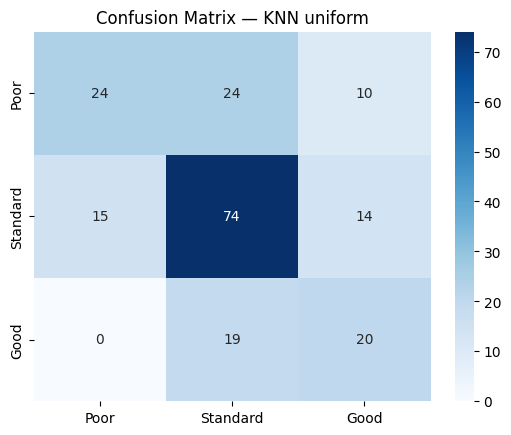

In [37]:
print("KNN (uniform weights)")
print("Accuracy:", accuracy_score(y_test, y_pred_uniform))
print(classification_report(y_test, y_pred_uniform))

cm = confusion_matrix(y_test, y_pred_uniform, labels=['Poor', 'Standard', 'Good'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Poor', 'Standard', 'Good'],
            yticklabels=['Poor', 'Standard', 'Good'])
plt.title("Confusion Matrix — KNN uniform")
plt.show()

Получили метрики сравнимые с теми, что получились изначально при использовании KNN из sklearn.

Пробую поменять параметры. Теперь возьмем `weights='distance'`.

In [38]:
knn_distance = KNNClassifier(k=15, weights='distance')
knn_distance.fit(X_train, y_train)

y_pred_distance = knn_distance.predict(X_test)

KNN (distance weights)
Accuracy: 0.59
              precision    recall  f1-score   support

        Good       0.46      0.49      0.47        39
        Poor       0.61      0.34      0.44        58
    Standard       0.63      0.77      0.69       103

    accuracy                           0.59       200
   macro avg       0.57      0.53      0.53       200
weighted avg       0.59      0.59      0.58       200



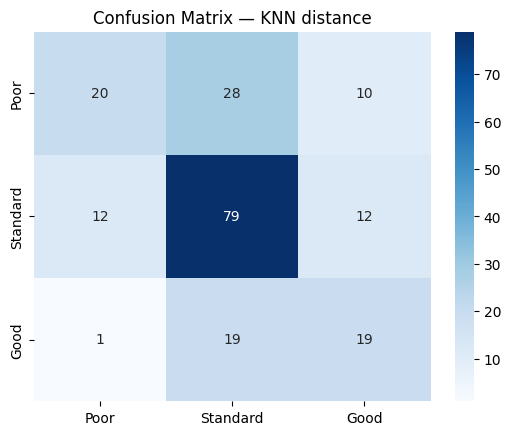

In [35]:
print("KNN (distance weights)")
print("Accuracy:", accuracy_score(y_test, y_pred_distance))
print(classification_report(y_test, y_pred_distance))

cm = confusion_matrix(y_test, y_pred_distance, labels=['Poor', 'Standard', 'Good'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Poor', 'Standard', 'Good'],
            yticklabels=['Poor', 'Standard', 'Good'])
plt.title("Confusion Matrix — KNN distance")
plt.show()


Улучшения качества модели не наблюдается.

In [13]:
import re

def convert_credit_history(age_str):
    if pd.isna(age_str):
        return None
    match = re.match(r'(\d+)\s*Years\s*and\s*(\d+)?\s*Months', age_str)
    if match:
        years = int(match.group(1))
        months = int(match.group(2)) if match.group(2) else 0
        return years + months / 12
    else:
        return None

df['Credit_History_Age_num'] = df['Credit_History_Age'].apply(convert_credit_history)

df[['Credit_History_Age', 'Credit_History_Age_num']].head()

,Credit_History_Age,Credit_History_Age_num
0,22 Years and 1 Months,22.083333
1,NaN,NaN
2,22 Years and 3 Months,22.250000
3,22 Years and 4 Months,22.333333
4,22 Years and 5 Months,22.416667


In [14]:
drop_cols = [
    'ID',
    'Customer_ID',
    'Name',
    'SSN',
    'Month',
    'Credit_History_Age'
]

df = df.drop(columns=drop_cols)

In [15]:
num_as_obj = [
    'Age',
    'Annual_Income',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Outstanding_Debt',
    'Amount_invested_monthly',
    'Monthly_Balance'
]

for col in num_as_obj:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [17]:
df = df[(df['Credit_History_Age_num'].between(0, 100))]

df = df[(df['Age'].between(0, 100))]

In [18]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [19]:
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [20]:
print(df['Credit_Score'].value_counts())

sample_size_per_class = 1000 // df['Credit_Score'].nunique()

df_sample = (
    df.groupby('Credit_Score', group_keys=False)
      .apply(lambda x: x.sample(min(len(x), sample_size_per_class), random_state=42))
)

print(df_sample['Credit_Score'].value_counts())

Credit_Score
Standard    44748
Poor        24401
Good        14882
Name: count, dtype: int64
Credit_Score
Good        333
Poor        333
Standard    333
Name: count, dtype: int64


/tmp/ipykernel_21305/3179496235.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min(len(x), sample_size_per_class), random_state=42))


In [ ]:
X_sample = df_sample.drop('Credit_Score', axis=1)
y_sample = df_sample['Credit_Score']

In [23]:
num_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_sample.select_dtypes(include=['object', 'bool']).columns

X_encoded = pd.get_dummies(X_sample, columns=cat_cols, drop_first=True)


In [24]:
scaler = StandardScaler()
X_encoded[num_cols] = scaler.fit_transform(X_encoded[num_cols])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded.values,
    y_sample.values,
    test_size=0.2,
    random_state=42,
    stratify=y_sample
)

In [26]:
knn_uniform = KNNClassifier(k=15, weights='uniform')
knn_uniform.fit(X_train, y_train)

y_pred_uniform = knn_uniform.predict(X_test)

KNN (uniform weights)
Accuracy: 0.635
              precision    recall  f1-score   support

        Good       0.64      0.79      0.71        66
        Poor       0.68      0.78      0.72        67
    Standard       0.55      0.34      0.42        67

    accuracy                           0.64       200
   macro avg       0.62      0.64      0.62       200
weighted avg       0.62      0.64      0.62       200



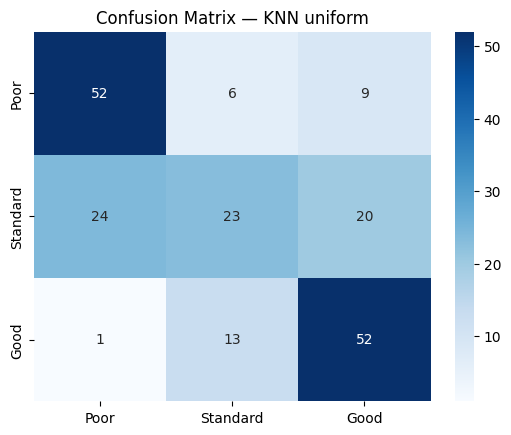

In [27]:
print("KNN (uniform weights)")
print("Accuracy:", accuracy_score(y_test, y_pred_uniform))
print(classification_report(y_test, y_pred_uniform))

cm = confusion_matrix(y_test, y_pred_uniform, labels=['Poor', 'Standard', 'Good'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Poor', 'Standard', 'Good'],
            yticklabels=['Poor', 'Standard', 'Good'])
plt.title("Confusion Matrix — KNN uniform")
plt.show()

Метрики улучшились, в среднем, по сравнению с предыдущим разом, но стандартный кредитный рейтинг модель угадывает плохо.

In [28]:
knn_distance = KNNClassifier(k=15, weights='distance')
knn_distance.fit(X_train, y_train)

y_pred_distance = knn_distance.predict(X_test)

KNN (distance weights)
Accuracy: 0.65
              precision    recall  f1-score   support

        Good       0.65      0.80      0.72        66
        Poor       0.69      0.79      0.74        67
    Standard       0.59      0.36      0.44        67

    accuracy                           0.65       200
   macro avg       0.64      0.65      0.63       200
weighted avg       0.64      0.65      0.63       200



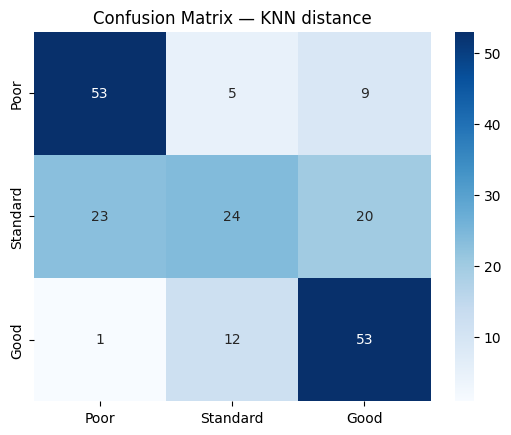

In [29]:
print("KNN (distance weights)")
print("Accuracy:", accuracy_score(y_test, y_pred_distance))
print(classification_report(y_test, y_pred_distance))

cm = confusion_matrix(y_test, y_pred_distance, labels=['Poor', 'Standard', 'Good'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Poor', 'Standard', 'Good'],
            yticklabels=['Poor', 'Standard', 'Good'])
plt.title("Confusion Matrix — KNN distance")
plt.show()


Результат улучшился. Но он все еще хуже, чем полученный в 3 пункте.

### Регрессия

Мой класс KNNRegressorCustom.

In [48]:
import numpy as np
from collections import Counter
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

class KNNRegressorCustom:
    def __init__(self, k=5, weights='uniform'):
        self.k = k
        self.weights = weights
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        return self
    
    def predict(self, X):
        y_pred = []
        for x in X:
            distances = np.linalg.norm(self.X_train - x, axis=1)
            k_indices = np.argsort(distances)[:self.k]
            k_distances = distances[k_indices]
            k_labels = self.y_train[k_indices]
            
            if self.weights == 'uniform':
                pred = np.mean(k_labels)
            elif self.weights == 'distance':
                weights = 1 / (k_distances + 1e-5)
                pred = np.sum(k_labels * weights) / np.sum(weights)
            else:
                raise ValueError("weights must be 'uniform' or 'distance'")
            
            y_pred.append(pred)
        return np.array(y_pred)
    
    def score(self, X, y):
        y_pred = self.predict(X)
        return {
            'MAE': mean_absolute_error(y, y_pred),
            'RMSE': np.sqrt(mean_squared_error(y, y_pred)),
            'R2': r2_score(y, y_pred)
        }


Повторим предобработку из бейзлайна.

In [77]:
df_reg = pd.read_csv(
    "vestiaire_20k.csv"
)

df_reg.head()

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,42438630,Wool hat,Wool hat Napapijri Black size 55 cm in Wool,"one size, like new",Napapijri Wool Hats & pull on hats,Men,Men Accessories,Autumn / Winter,Never worn,0.0,...,Tourcoing,25355068,Raffaele25355068,1-2 days,Italy,11.0,27.0,0.0,131.0,100.0
1,30324738,Leather flats,Leather flats Bruno Magli Black size 43.5 EU i...,"Excellent condition! UK size 9.5, EU 43.5",Bruno Magli Leather Flats,Men,Men Shoes,All seasons,Very good condition,6.0,...,Tourcoing,12877585,stelios12877585,NaN,Greece,5.0,2.0,649116.0,5.0,100.0
2,39089334,Polo shirt,Polo shirt LA MARTINA Multicolour size XXL Int...,"La Martina long sleeve polo shirt, size XXL in...",LA MARTINA Cotton Polo shirts,Men,Men Clothing,All seasons,Good condition,2.0,...,Tourcoing,21283960,anneanna21283960,1-2 days,Germany,132.0,90.0,0.0,25.0,95.0
3,39285681,Scarf,Scarf Twinset White in Cotton,Lightweight cotton scarf. White color with 2 h...,Twinset Cotton Scarves,Women,Women Accessories,Autumn / Winter,Very good condition,7.0,...,Tourcoing,15273943,bianca15273943,3-5 days,Italy,5.0,38.0,0.0,7.0,100.0
4,41107394,Leather low trainers,Leather low trainers Tod's Blue size 9.5 UK in...,"Iconic Tod's shoe, dark blue color. Mix suede ...",Tod's Leather Trainers,Men,Men Shoes,All seasons,Good condition,3.0,...,Tourcoing,19395265,Nicchia_20,6-7 days,Italy,4.0,15.0,0.0,163.0,100.0


In [78]:
drop_cols = [
    'product_id', 'product_name', 'product_description', 'brand_url',
    'seller_username', 'brand_name', 'product_keywords', 'seller_id', 'brand_id', 'seller_price' , 'seller_country'
]


df_reg = df_reg.drop(columns=drop_cols)

In [79]:
df_reg = df_reg.dropna(subset=[
    'product_category', 'has_cross_border_fees', 'usually_ships_within'
])

Берем уменьшенный датасет.

In [80]:
sample_size = 1000
df_sample = df_reg.sample(n=sample_size, random_state=42) 

In [81]:
X_sample = df_sample.drop('price_usd', axis=1)
y_sample = df_sample['price_usd']

In [82]:
num_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_sample.select_dtypes(include=['object', 'bool']).columns

In [83]:

X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample, test_size=0.2, random_state=42
)

In [84]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ]
)

X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

In [85]:
k_values = [3, 5, 7, 9, 15]
results = []
for k in k_values:
    knn = KNNRegressorCustom(k=k, weights='distance')
    knn.fit(X_train_scaled, y_train.to_numpy())
    metrics = knn.score(X_test_scaled, y_test)
    results.append({
        'k': k,
        **metrics
    })

results_df = pd.DataFrame(results)
print(results_df)


    k         MAE        RMSE        R2
0   3  133.682692  283.497561  0.852142
1   5  133.678146  315.951020  0.816352
2   7  135.190369  292.031283  0.843106
3   9  138.434644  320.826362  0.810641
4  15  149.165950  382.437373  0.730929


Лучший результат при k=3. MAE и RMSE лучше, чем в бейзлайне, но R2 хуже.

Улучшенный бейзлайн

In [92]:
drop_cols = ['product_type']

df_reg_sample_n = df_sample.drop(columns=drop_cols)

In [93]:
X_sample = df_reg_sample_n.drop('price_usd', axis=1)
y_sample = df_reg_sample_n['price_usd']

In [94]:
num_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_sample.select_dtypes(include=['object', 'bool']).columns

In [95]:

X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample, test_size=0.2, random_state=42
)

In [96]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ]
)

X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

In [97]:
k_values = [3, 5, 7, 9, 15]
results = []
for k in k_values:
    knn = KNNRegressorCustom(k=k, weights='distance')
    knn.fit(X_train_scaled, y_train.to_numpy())
    metrics = knn.score(X_test_scaled, y_test)
    results.append({
        'k': k,
        **metrics
    })

results_df = pd.DataFrame(results)
print(results_df)


    k         MAE        RMSE        R2
0   3  129.968858  280.130931  0.855633
1   5  131.932304  315.696948  0.816647
2   7  131.420696  289.074655  0.846267
3   9  137.152803  319.945908  0.811679
4  15  147.517312  379.791951  0.734639


Метрики немного улучшились. Лучший результат все еще при k=3. МАЕ и RMSE лучше, чем в улучшенном бейзлайне, но R2 хуже.

### Вывод
При реализации своего класса KNN мне удалось хорошо приблизиться к значениям sklearn, однако мой алгоритм плохо оптимизирован и не справится с большим набором данных, так что для реальных задач лучше будет использовать модель sklearn. 

| Задача | Бейзлайн | Улучшенный бейзлайн | Моя реализация | Моя реализация улучшенная|
|----------|-------------------------|---------------------------|------------------------|---------------------------|
Классификация (Accuracy)| 0.6252|**0.68825** | 0.635| 0.65| |
Регрессия (R2)|0.9048 |**0.9340** | 0.8521| 0.8556| |